<a href="https://colab.research.google.com/github/BDonadelli/Codigos-em-financas/blob/main/Ibov_desde_68.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url='https://raw.githubusercontent.com/BDonadelli/Codigos-em-financas/main/ibov_desde_1968.csv'
#https://www.b3.com.br/pt_br/market-data-e-indices/indices/indices-amplos/indice-ibovespa-ibovespa-estatisticas-historicas.htm

In [3]:
b3 = pd.DataFrame()
b3 = pd.read_csv(url) 
b3.columns = ['data','preco']
b3 = b3.set_index('data')
b3.index = pd.to_datetime(b3.index)
pd.options.display.float_format = '{:1,.13f}'.format
b3

,preco
data,
1968-01-02,0.0000000001000
1968-01-03,0.0000000001000
1968-01-04,0.0000000000990
1968-01-05,0.0000000000970
1968-01-08,0.0000000000970
...,...
2021-08-04,"121,801.0000000000000"
2021-08-05,"121,633.0000000000000"
2021-08-06,"122,810.0000000000000"


In [4]:
data = pd.DataFrame()
data['preco'] = yf.download("^BVSP", period = 'max',auto_adjust=True)['Close']
data.head(2)

[*********************100%***********************]  1 of 1 completed


,preco
Date,
1993-04-27,24.5000000000000
1993-04-28,24.2999992370605


In [5]:
ibov = pd.concat([b3,data.loc['2021-08-11':]])

<Axes: >

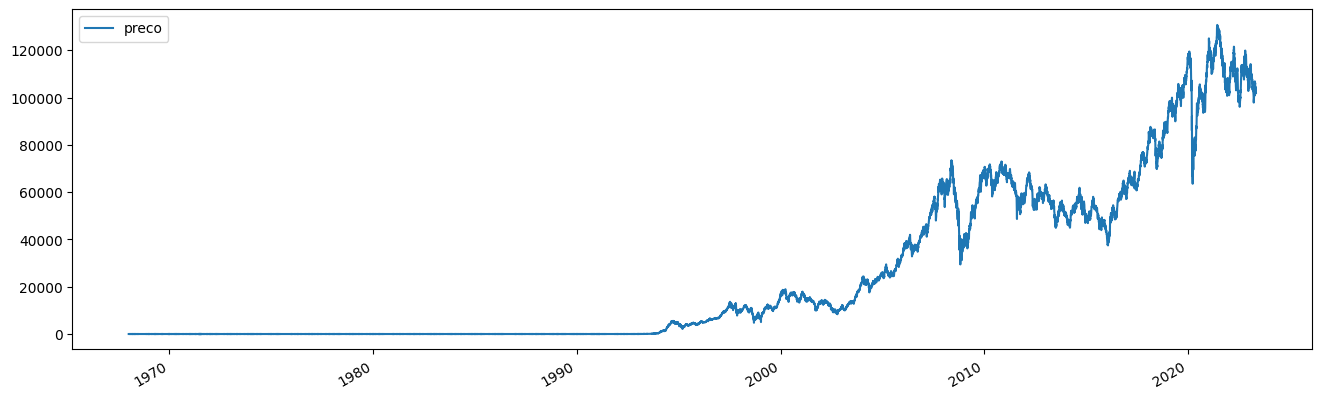

In [6]:
ibov.plot(figsize = (16,5))

In [7]:
b3.loc[:'1993-04-26'].tail(2)

,preco
data,
1993-04-23,23.3387000000000
1993-04-26,24.8219000000000


In [8]:
data.head(2)

,preco
Date,
1993-04-27,24.5000000000000
1993-04-28,24.2999992370605


In [9]:
ibov2 = pd.concat([b3.loc[:'1993-04-26'],data])
ibov2

,preco
1968-01-02,0.0000000001000
1968-01-03,0.0000000001000
1968-01-04,0.0000000000990
1968-01-05,0.0000000000970
1968-01-08,0.0000000000970
...,...
2023-04-25,"103,220.0000000000000"
2023-04-26,"102,312.0000000000000"
2023-04-27,"102,923.0000000000000"
2023-04-28,"104,432.0000000000000"


<Axes: >

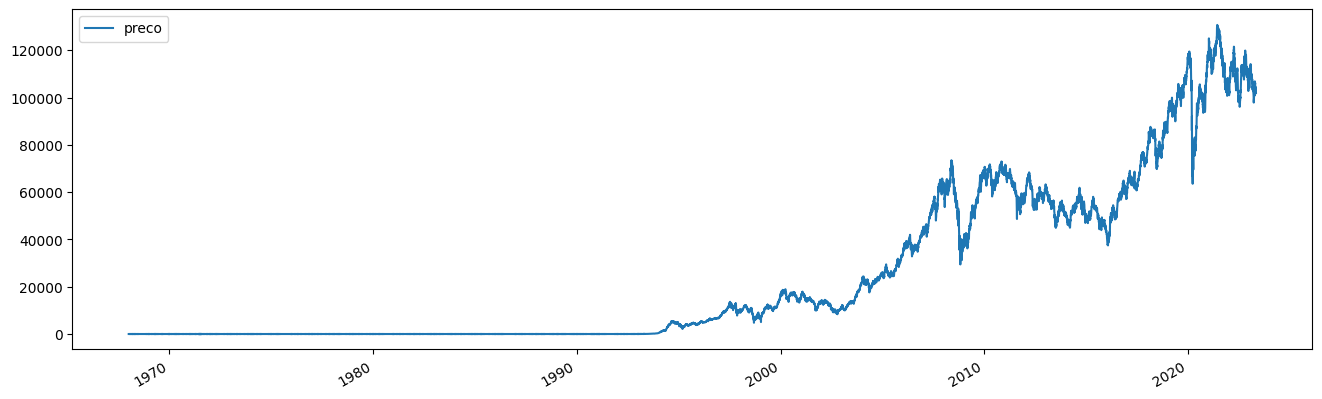

In [10]:
ibov2.plot(figsize = (16,5))

In [11]:
mensal=pd.DataFrame()
mensal['preco']= ibov.preco.copy()
mensal.index = pd.to_datetime(mensal.index)
mensal = mensal.resample('M').ffill()#agg(lambda x: (x + 1).prod() - 1)
mensal['retornos']=mensal.pct_change()
mensal

,preco,retornos
1968-01-31,0.0000000001070,NaN
1968-02-29,0.0000000001230,0.1495327102804
1968-03-31,0.0000000001340,0.0894308943089
1968-04-30,0.0000000001640,0.2238805970149
1968-05-31,0.0000000001780,0.0853658536585
...,...,...
2023-01-31,"113,532.0000000000000",0.0318183057502
2023-02-28,"104,932.0000000000000",-0.0757495684036
2023-03-31,"101,882.0000000000000",-0.0290664430298
2023-04-30,"104,432.0000000000000",0.0250289550657


In [12]:
returns_table = mensal.pivot_table(values='retornos', 
                               index=mensal.index.year, 
                               columns=mensal.index.month, 
                               aggfunc='mean')
returns_table

,1,2,3,4,5,6,7,8,9,10,11,12
1968,NaN,0.1495327102804,0.0894308943089,0.2238805970149,0.0853658536585,-0.0842696629213,-0.0061349693252,0.0308641975309,0.1137724550898,-0.0322580645161,0.0055555555556,0.0000000000000
1969,0.2817679558011,0.2370689655172,0.0348432055749,0.0976430976431,0.3006134969325,-0.0448113207547,0.3209876543210,0.1364485981308,-0.0707236842105,-0.0159292035398,-0.1097122302158,0.0000000000000
1970,0.1353535353535,0.0836298932384,-0.0131362889984,-0.0249584026622,0.0170648464164,-0.0553691275168,0.1563055062167,-0.0168970814132,0.1546875000000,-0.0635994587280,0.1011560693642,0.0000000000000
1971,0.4107611548556,0.0195348837209,0.1441605839416,0.1953748006380,0.5577051367578,0.0000000000000,0.0077087794433,-0.1623459413515,-0.0304414003044,-0.0920983778127,-0.1279538904899,0.0000000000000
1972,0.0337078651685,0.0498721227621,0.0000000000000,-0.1516443361754,0.0387652548457,-0.1423635107118,-0.1426269137792,0.2227443609023,-0.0914681014604,-0.1565143824027,0.0621865596790,-0.0500472143532
1973,-0.0129224652087,-0.0483383685801,0.1121693121693,0.2806850618459,-0.0861812778603,-0.0097560975610,0.0320197044335,0.0898965791567,-0.0277372262774,-0.0750750750751,-0.0422077922078,0.0000000000000
1974,-0.0144067796610,0.0945829750645,0.1162608012569,-0.2019704433498,-0.0458553791887,-0.0027726432532,0.1408711770158,-0.0048740861089,-0.1248979591837,-0.0410447761194,0.1721789883268,0.0000000000000
1975,0.2207468879668,-0.0135961930659,0.0027567195038,0.0089347079038,0.1416893732970,0.3042959427208,0.0974382433669,-0.1221342225927,0.0835707502374,-0.0692375109553,-0.0400188323917,0.0000000000000
1976,0.1476213830309,0.0367521367521,-0.1121187139324,0.0032497678737,0.1369736233225,0.1452991452991,-0.0646766169154,0.0288753799392,-0.0727474150665,-0.1537236160892,0.0828235294118,0.0000000000000
1977,0.1594958713603,-0.0176161919040,0.0835558946967,-0.0066901408451,-0.0106345267636,-0.0085990684343,0.0205999277196,0.1147308781870,0.0975222363405,-0.0054992764110,-0.0465657741560,0.0000000000000


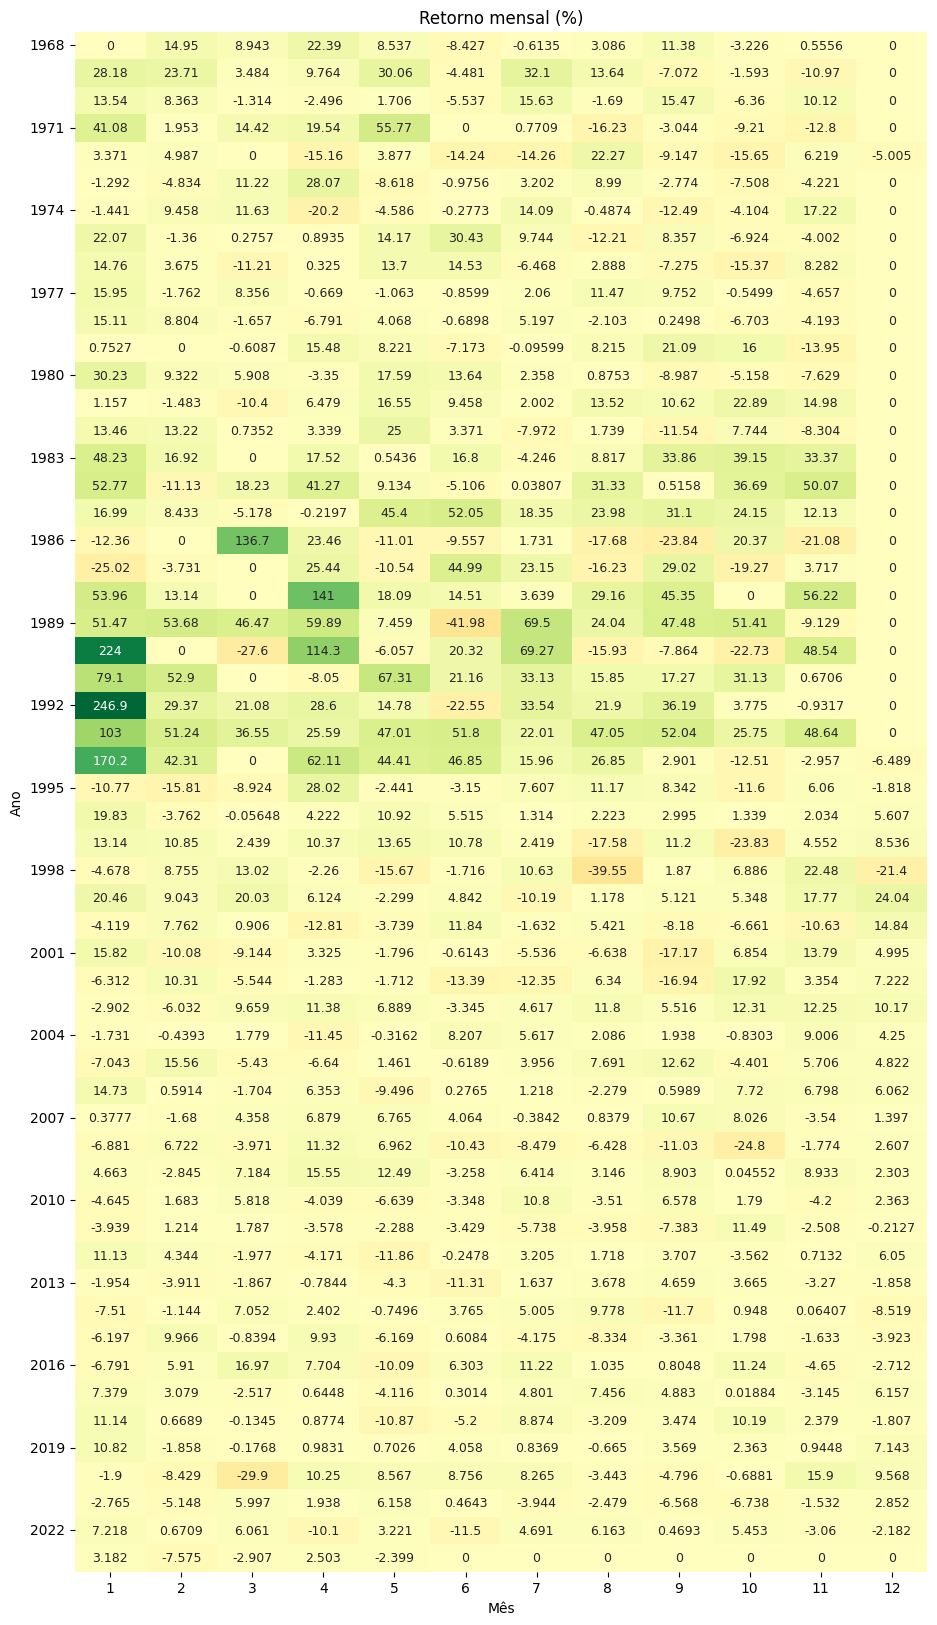

In [13]:
fig = plt.figure(1)

ax = plt.gca()

sns.heatmap(returns_table.fillna(0)*100.0,annot=True,annot_kws={"size": 9},cmap='RdYlGn',
            alpha=1.0,center=0.0,cbar=False,ax=ax, fmt='.4g')
ax.set_ylabel('Ano')
ax.set_xlabel('Mês')
ax.set_title("Retorno mensal (%)")
fig.set_size_inches(11,20)
plt.show()

<Axes: >

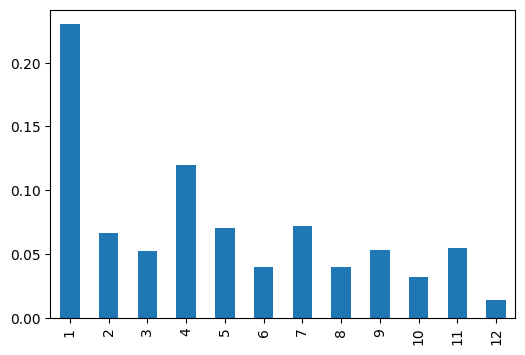

In [14]:
returns_table.mean().plot.bar(figsize=(6,4))

In [15]:
!pip install -q quantstats
import quantstats as qs


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 5.0 MB/s eta 0:00:00


In [60]:
retorno=ibov.pct_change()
retorno.dropna(inplace=True)

In [61]:
plt.rcParams["font.family"] = "sans-serif"


[Performance Metrics]



                           Strategy
-------------------------  ---------------------------
Start Period               1968-01-03
End Period                 2023-05-02
Risk-Free Rate             0.0%
Time in Market             96.0%

Cumulative Return          101,926,953,125,002,032.00%
CAGR﹪                     86.67%

Sharpe                     1.77
Prob. Sharpe Ratio         100.0%
Smart Sharpe               1.55
Sortino                    2.9
Smart Sortino              2.54
Sortino/√2                 2.05
Smart Sortino/√2           1.8
Omega                      1.4

Max Drawdown               -72.85%
Longest DD Days            3400
Volatility (ann.)          39.48%
Calmar                     1.19
Skew                       0.88
Kurtosis                   12.54

Expected Daily %           0.25%
Expected Monthly %         5.33%
Expected Yearly %          85.36%
Kelly Criterion            15.62%
Risk of Ruin               0.0%
Daily Value-at-Risk        -3.81%
Expected Shortfall (cVa

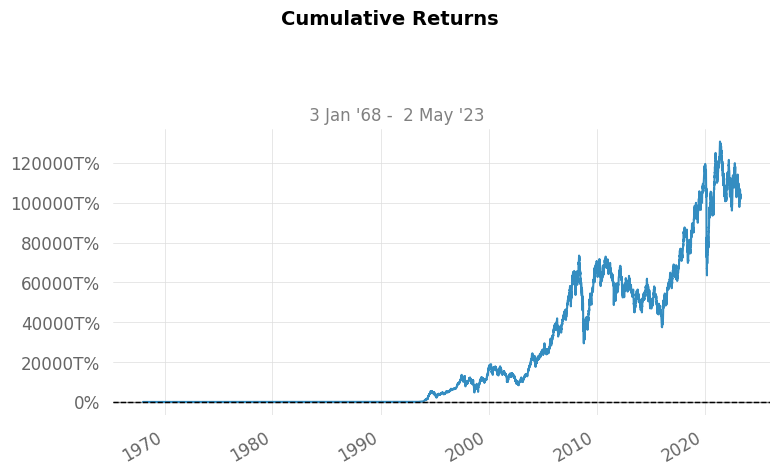

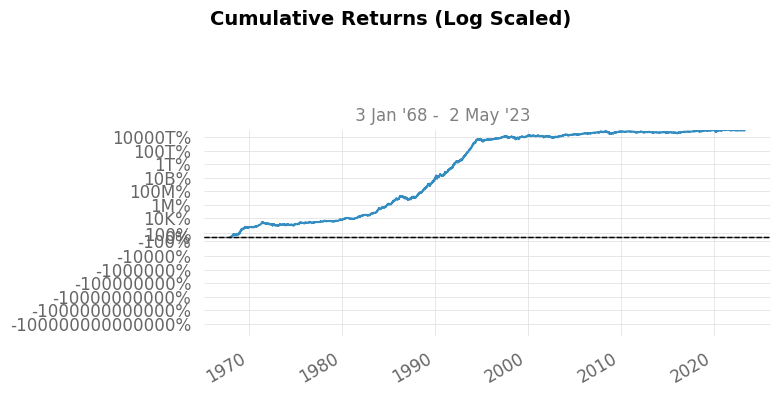

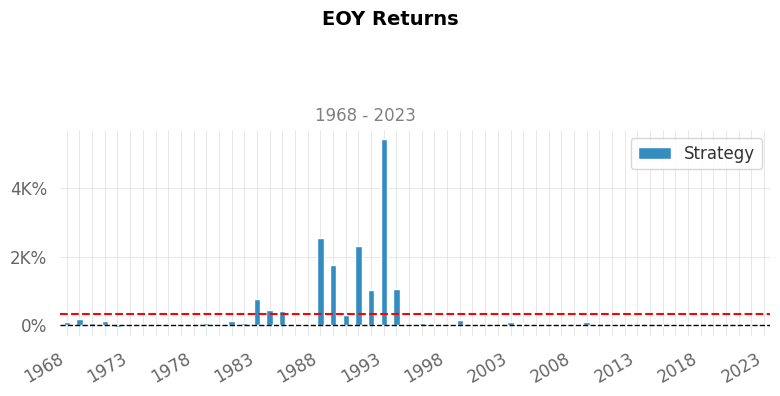

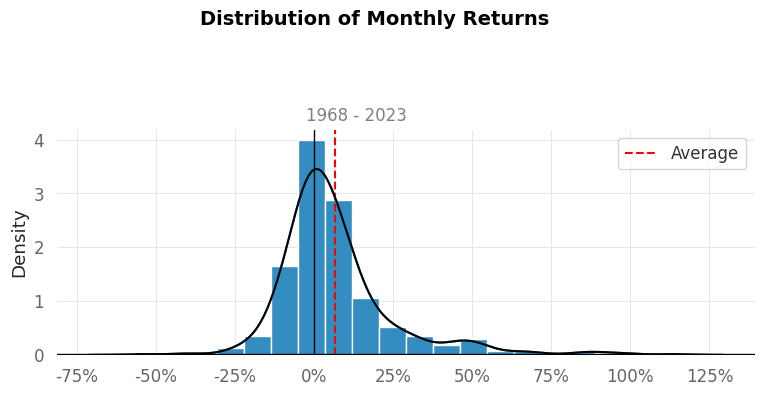

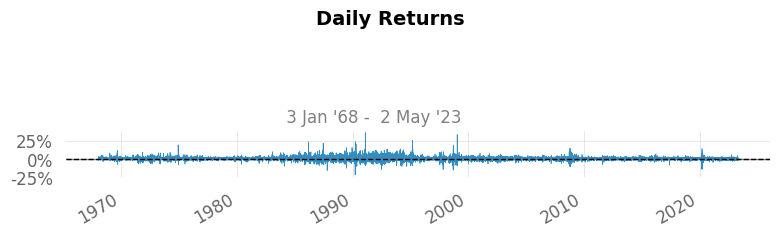

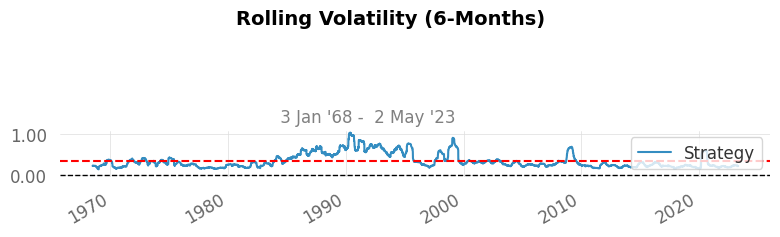

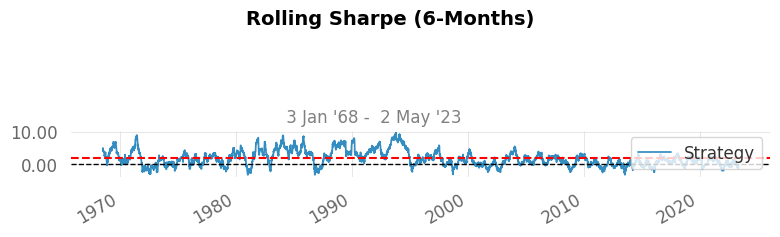

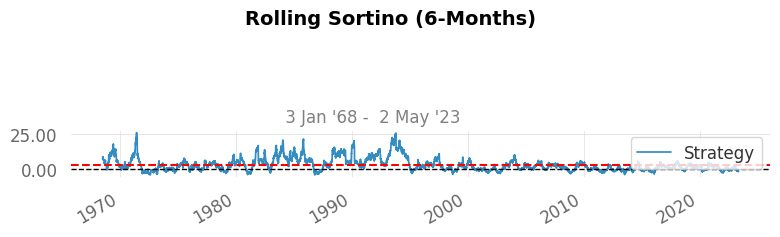

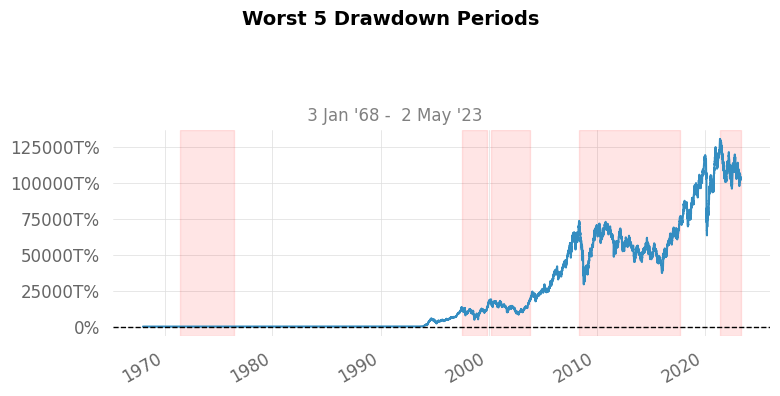

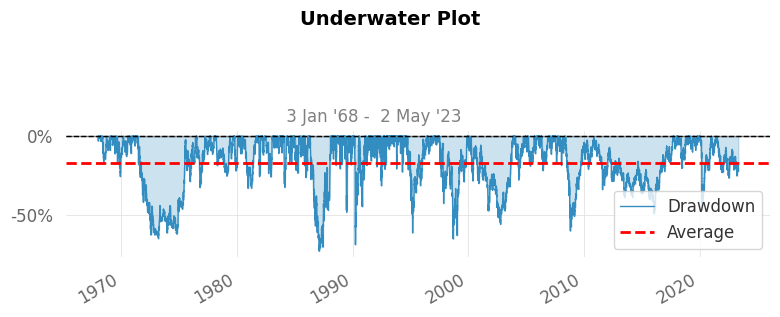

/usr/local/lib/python3.10/dist-packages/quantstats/stats.py:968: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  returns = returns.pivot('Year', 'Month', 'Returns').fillna(0)


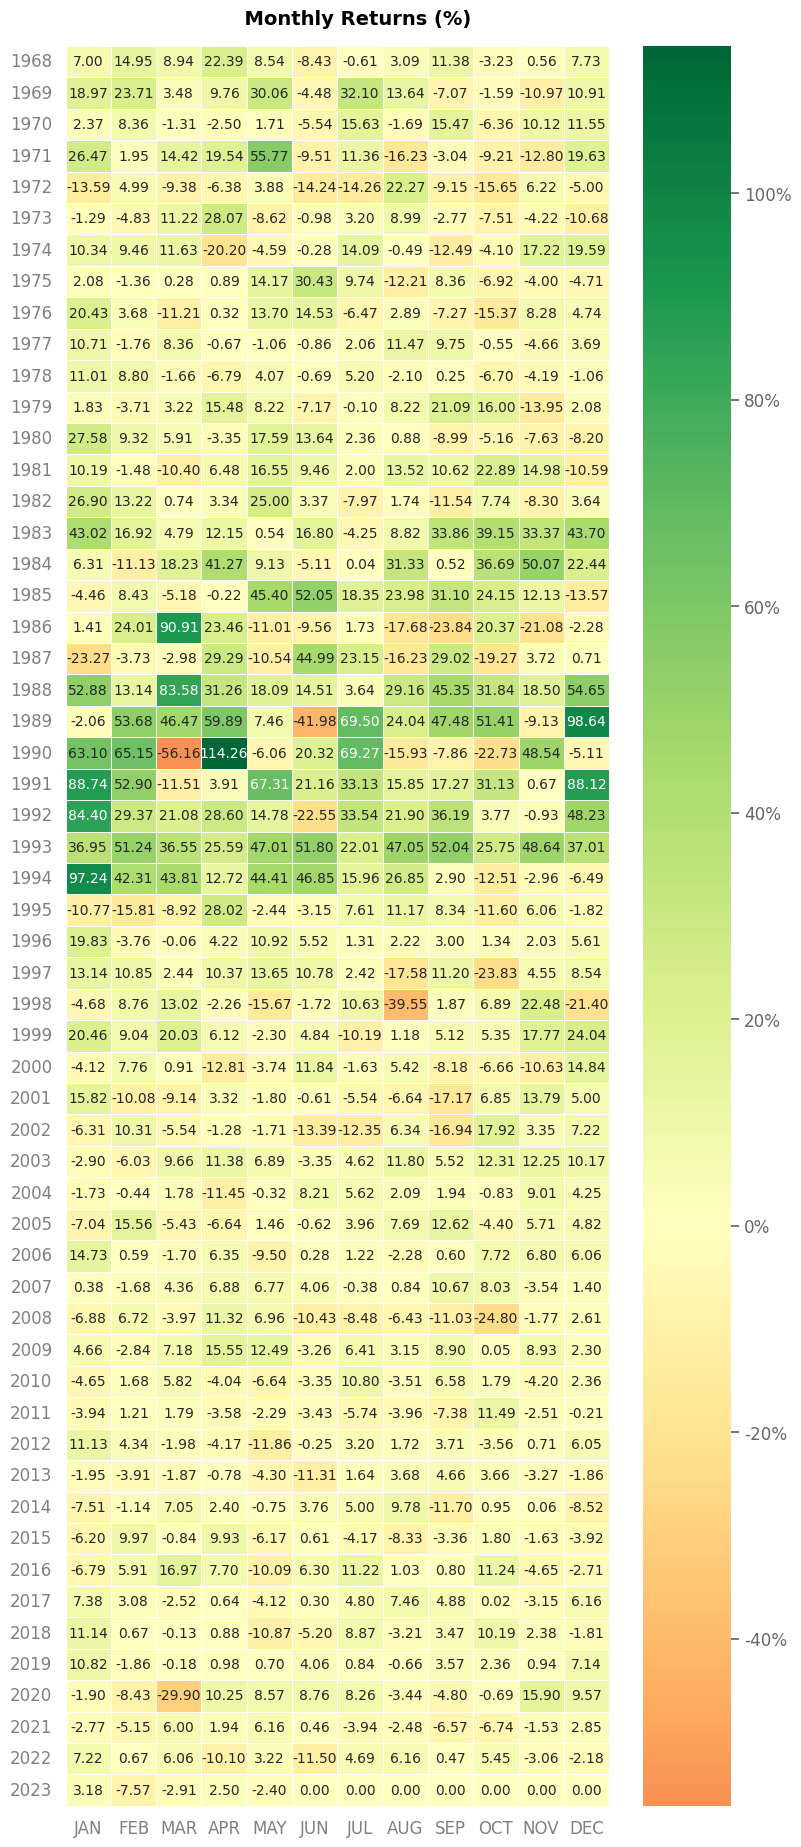

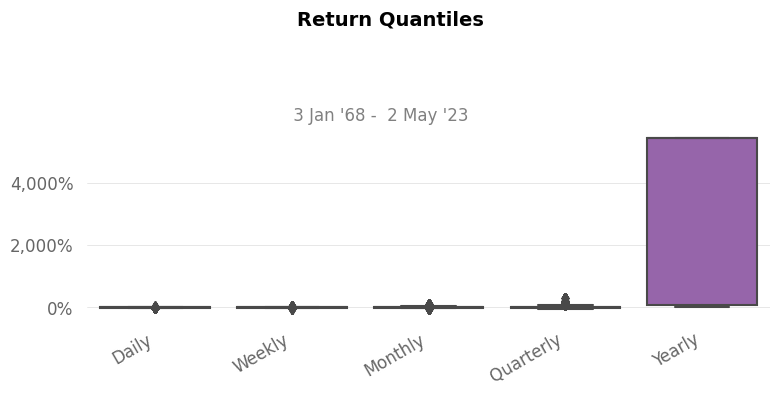

In [62]:
qs.reports.full(retorno.preco)